## **AC-3**

Backtracking - CSP -  De ce ne dorim optimizari (AC3) ?

Asa cum ati vazut in laborator, metoda Backtracking are o complexitate exponentiala.Cu toate ca pentru multe probleme rezolvabile prin Backtracking nu se cunosc algoritmi care ruleaza in timp polinomial (problemele de satisfacere a constrangerilor - CSP -, de exemplu), datorita timpilor de executie foarte mari, e natural ne punem intrebarea: "Cum putem totusi imbunatati timpul de executie al metodei Backtracking ?". Exista mai multe metode propuse de-a lungul timpului care rezulta in timp redus de executie pentru o multitudine de probleme, *nereducand* totusi timpul de executie in cazul cel mai defavorabil (exponential). Ele raman totusi utile, intrucat pentru anumite date de intrare, timpul de executie poate fi redus substantial.


AC-3 (Arc Consistency 3) este un astfel de algoritm. El face parte dintr-o serie de algoritmi de tip *AC* si este cel mai popular in practica pentru CSP-uri rezonabile ca dificultate(versiunile celelalte sunt fie ineficiente, fie dificil de implementat).Numele algoritmului nu este intamplator, ci se bazeaza pe urmatoarea reprezentare a CSP-urilor:

> ***Orice CSP se poate reprezenta ca un graf orientat in care nodurilor sunt variabile, iar arcele dintre noduri sunt constrangeri intre variabile.***


---

**Reminder** : O problema de satisfacere a constrangerilor (CSP) este definita de variabile, domenii ale variabilelor si constrangeri. O solutie valida pentru o astfel de problema este gasirea unei asignari de valori din *domenii* tuturor *variabilelor*, respectand toate *constrangerile*.

**Precizare** :
Putem avea 2 tipuri de constrangeri:

    -constrangeri unare (valorile unei variabile trebuie sa respecte o anumita proprietate, de ex. a % 2 == 0)
    
    -constrangeri binare (valorile unei variabile trebuie sa respecte o anumita proprietate in raport cu valorile altei variabile, de ex. a + b == 5). Aceste constrangeri sunt simetrice.
    

*Exemplu de graf*:

Fie urmatoarea CSP: *Consideram a, o variabila ce are domeniul D(a) = {0, 1, 2, 3, 4, 5, 6} si b o variabila ce are domeniul D(b) = {0, 1, 2, 3, 4}. Cunoastem constrangerile C1 = "a % 2 == 0" si C2 = “a + b trebuie sa fie egal cu 5”.*

Putem reprezenta aceasta problema sub forma unui graf in urmatorul mod (pentru simplitate, am reprezentat doar constrangerile binare, cele unare fiind practic o filtrare a valorilor la nivel de nod):
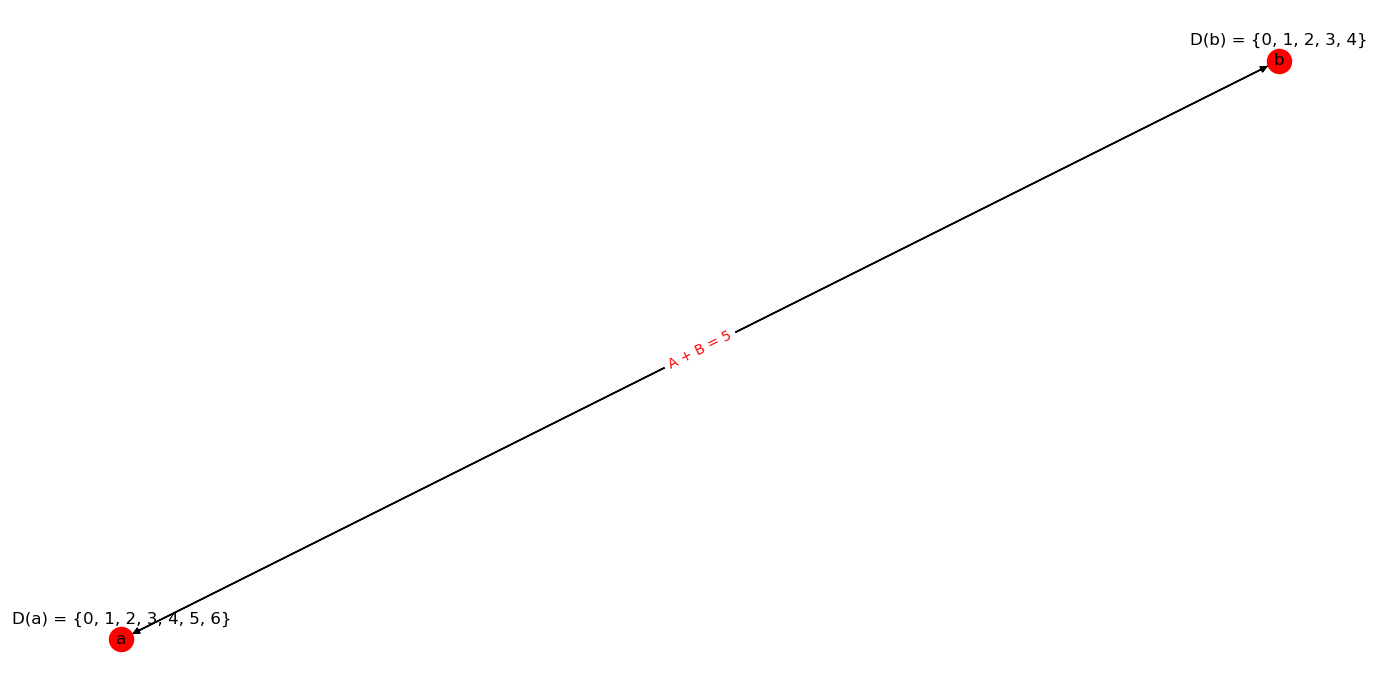


Astfel, in noduri avem variabilele(*a si b* si domeniile corespunzatoare, iar pe muchii avem constrangerile aferente intre variabile (*a+b = 5*)).

Revenind la numele algoritmului, AC-3 cauta sa reduca domeniile variabilelor din CSP, astfel incat spatiul starilor in momentul rularii metodei Backtracking sa fie cat mai mic. De ce vrem acest lucru ? Tocmai din motivul enuntat la inceput, acela de a salva timp computational in momentul rularii unui algoritm backtracking (exponential, in general). Daca vom reduce spatiul starilor, atunci, in mod natural, Backtracking va petrece un timp mai scurt explorand, in vederea gasirii solutiei (o asignare valida de valori fiecarei *variabile*), intrucat vor fi mai putine stari prin care algoritmul va trebui sa treaca. De asemenea, graful de consistenta fiind orientat, iar, datorita faptului ne dorim sa reducem domeniul ambelor variabile aferent unui arc, vom introduce 2 arce orientate, ((a, b) si (b,a) - in ex. dat).

AC-3 duce la aceasta reducere a spatiului starilor prin asigurarea arc-consistentei(*de aici si numele*) intre nodurile din graful aferent CSP-ului. Acum, arc-consistenta se refera la pastrarea acelor valori din domeniul de definitie al unei variabile x, astfel incat pentru fiecare (x, y) catre o alta variabila y, sa existe o valoare din domeniul lui y care, impreuna cu valoarea curenta a lui x, sa respecta constrangerea data.


**Pseudocod(Wikipedia)**


**Complexitate** : O(ed^3), unde
* e - numarul de arce, 
* d - dimensiunea maxima a unui domeniu.

*Explicatie*: Functia arc-reduce are complexitate O(d^2) - 2 for-uri dupa valorile din domeniu a 2 variabile -. Asadar, mai trebuie sa vedem de cate ori este apelata arc-reduce. Dupa cum putem vedea, in coada din bucla principala din functia ac3, avem initial e elemente in coada. Pe parcurs, se vor readauga arce in coada. De cate ori putem readauga un arc? De fiecare data cand scoatem o valoare din domeniul variabilei catre care e orientat arcul, putem reinsera acel arc. Avem e - nr. de arce, d - dimensiunea maxima a domeniului, deci e * d putem reinsera in cel mai defavorabil caz. Deci, complexitatea este O((e + e*d) * d^2), adica O(e * d ^ 3). 

In cele ce urmeaza, vom implementa AC-3 si Backtracking si vom rezolva urmatorul CSP, similar cu cel de mai sus: *"Consideram a, o variabila ce are domeniul D(a) = {0, 1, 2, 3, 4, 5} si b o variabila ce are domeniul D(b) = {0, 1, 2, 3, 4, 5}. Cunoastem constrangerile C1 = "a % 2 == 0" si C2 = “a + b trebuie sa fie egal cu 4”*

In [126]:
// Interfata utila pentru a verifica constrangeri unare (folosind lambdas)
interface UnaryConstraint extends Constraint {
    boolean isSatisfiedBy(int a);
}

// Interfata utila pentru a verifica constrangeri binare (folosind lambdas)
interface BinaryConstraint extends Constraint {
    boolean isSatisfiedBy(int a, int b);
}

// Wrapper pentru arcele din graful de consistenta
class Edge {
    String x, y;
    
    Edge(String x, String y) {
        this.x = x;
        this.y = y;
    } 
}

// Wrapper pentru functiile de backtracking si AC3
//    -> din motive de simplitate, presupunem ca avem un singur tip de constrangere binara,
//       care se aplica pentru toate arcele.
//    -> tot din motive de simplitate, presupunem ca identificam variabilele din multimea X
//       prin string-uri
class Backtracking {
    // Algoritmul AC3, asa cum e descris in pseudocod.
    boolean ac3(ArrayList<String> X, HashMap<String, ArrayList<Integer>> D, HashMap<String,
             ArrayList<UnaryConstraint>> R1, ArrayList<Edge> edges, BinaryConstraint r2) {

        for (String x : X) {
            Iterator<Integer> vxIterator = D.get(x).iterator();
            
            while (vxIterator.hasNext()) {
                Integer vx = vxIterator.next();
                
                for (UnaryConstraint r1 : R1.get(x)) {
                    if (!r1.isSatisfiedBy(vx)) {
                        vxIterator.remove();
                    }
                }
            }
        }        

        Queue<Edge> workList = new LinkedList<Edge>();
        
        for (Edge edge : edges) {
            workList.add(edge);
        }
        
        while (!workList.isEmpty()) {
            Edge edge = workList.poll();
            
            if (arcReduce(edge, D, r2)) {
                if (D.get(edge.x).isEmpty()) {
                    return false;
                } else {
                    for (Edge candidateEdge : edges) {
                        if (candidateEdge.y == edge.x && candidateEdge.x != edge.y &&
                                !workList.contains(edge)) {
                            workList.add(candidateEdge);
                        }
                    }
                }
            }
        }
        
        return true;
    }
    
    // Functia arcReduce, asa cum e descrisa in pseudocod
    boolean arcReduce(Edge edge, HashMap<String, ArrayList<Integer>> D, BinaryConstraint r2) {
        boolean change = false;
        Iterator<Integer> vxIterator = D.get(edge.x).iterator();
        
        while (vxIterator.hasNext()) {    
            boolean satisfied = false;
            Integer vx = vxIterator.next();
            
            for (Integer vy : D.get(edge.y)) {
                if (r2.isSatisfiedBy(vx, vy)) {
                    satisfied = true;
                    break;
                }
            }
            
            if (!satisfied) {
                vxIterator.remove();
                change = true;
            }
        }
        
        return change;
    }
    
    // Functia de verificare a solutiei din algoritmul backtracking
    boolean check(Integer a, Integer b) {
        return (a + b == 4);
    }
    
    // Functia corespunzatoare algoritmului backtracking. Incercam sa asignam o valoare
    // lui a, apoi lui b si, la final, verificam daca este solutie.
    void back(ArrayList<ArrayList<Integer>> sols, 
              Integer a, Integer b, ArrayList<Integer> Da, ArrayList<Integer> Db) {
        if (a != null && b != null) {
            if (check(a, b)) {
                ArrayList<Integer> sol = new ArrayList<Integer>();
                sol.add(a);sol.add(b);

                sols.add(sol);
            }
            
            return;
        }
        
        if (a == null) {
            for (Integer va : Da) {
                back(sols, va, b, Da, Db);
            }
        } else {
            // b == NULL obligatoriu daca ajungem aici
            for (Integer vb : Db) {
                back(sols, a, vb, Da, Db);
            }
        }
    }
}

In [127]:
//Construim variabilele, reprezentate prin 2 string-uri ("a" si "b")
ArrayList<String> X = new ArrayList<String>();
X.add("a"); X.add("b");


// Construim domeniile variabilelor : {0, 1, 2, 3, 4,5} pentru amandoua.
HashMap<String, ArrayList<Integer>> D = new HashMap<String, ArrayList<Integer>>();

ArrayList<Integer> da = new ArrayList<Integer>();
da.add(0);da.add(1);da.add(2);da.add(3);da.add(4);da.add(5);

ArrayList<Integer> db = new ArrayList<Integer>();
db.add(0);db.add(1);db.add(2);db.add(3);db.add(4);db.add(5);

D.put("a", da);D.put("b", db);

// Afisam domeniile initiale
System.out.println("Domeniile initiale ale variabilelor:");
System.out.print("D(x): {");
for (Integer vy : D.get(X.get(0))) {
    System.out.print(vy + " ");
}
System.out.println("} ");

System.out.print("D(y): {");
for (Integer vy : D.get(X.get(1))) {
    System.out.print(vy + " ");
}
System.out.println("} ");

// Construim constrangerile unare
HashMap<String, ArrayList<UnaryConstraint>> R1 = new HashMap<String, ArrayList<UnaryConstraint>>();

// Pentru variabila "a" avem constrangerea de paritate.
ArrayList<UnaryConstraint> aConstraints = new ArrayList<UnaryConstraint>();
aConstraints.add((a) -> a % 2 == 0);
R1.put("a", aConstraints);

// Pentru variabila "b" nu avem nicio constrangere (adaugam un vector vid).
R1.put("b", new ArrayList<UnaryConstraint>());

// Adaugam arcele din graf.
ArrayList<Edge> edges = new ArrayList<Edge>();
edges.add(new Edge("a", "b"));
edges.add(new Edge("b", "a"));

// Setam constrangerea binara.
BinaryConstraint r2 = (a, b) -> a + b == 4;


Backtracking bkt = new Backtracking();

// Rulam algoritmul AC3
bkt.ac3(X, D, R1, edges, r2);

// Afisam noile domenii
System.out.println("Domeniile variabilelor dupa rularea AC-3: ");

System.out.print("D(x): {");
for (Integer vx : D.get(X.get(0))) {
    System.out.print(vx + " ");
}
System.out.println("}");

System.out.print("D(y): {");
for (Integer vy : D.get(X.get(1))) {
    System.out.print(vy + " ");
}
System.out.println("}");

Domeniile initiale ale variabilelor:
D(x): {0 1 2 3 4 5 } 
D(y): {0 1 2 3 4 5 } 
Domeniile variabilelor dupa rularea AC-3: 
D(x): {0 2 4 }
D(y): {0 2 4 }


In [128]:
//Rulam backtracking pe noile domenii;
ArrayList<ArrayList<Integer>> sols = new ArrayList<ArrayList<Integer>>();

bkt.back(sols, null, null, D.get(X.get(0)), D.get(X.get(1)));

System.out.println("Solutiile problemei sunt:");

for (ArrayList<Integer> sol : sols) {
    for (Integer i : sol) {
        System.out.print(i + " ");
    }
    System.out.println();
}

Solutiile problemei sunt:
0 4 
2 2 
4 0 


**Observatie**: Dupa cum puteti vedea, AC-3 a redus domeniul variabilelor de la {0, 1, 2, 3, 4, 5} la {0, 2, 4} reducand spatiul de cautare. Apoi am rulat Backtracking pe noile domenii si am determinat solutiile.

**Important**:
* AC3 intoarce false daca domeniul unei variabile devine vid, neexistand o solutie pentru CSP.
* AC3 nu garanteaza ca, daca niciun domeniu nu devine vid, atunci exista cu siguranta o solutie. Acesta doar reduce dimensiunea domeniilor, urmand ca determinarea solutiei/solutiilor sa se realizeze cu backtracking, ca mai sus.

# N-Queens



Incercati sa modelati problema N-Queens sub forma unui CSP. Cine sunt variabilele ? Dar domeniile si constrangerile?

**Hint 1**: Ce rol ar putea juca reginele? Unde pot fi pozitionate ele?

**Hint 2**: Intre ce variabile putem avea constrangeri?

Modificati implementarea de mai sus astfel incat sa puteti rezolva N-Queens cu AC-3 si BKT.

**Incercati sa va ganditi la un exemplu pentru problemei N-Queens, in care, dupa rularea AC-3, problema inca nu are solutie ! **

**Hint** : Incercati pentru N = 2 si N = 3, deoarece doar in aceste cazuri problema nu are solutie.